In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

fuel_econ = pd.read_csv(r'C:\Users\venxr\Udacity_exercises\AIPND-master\Matplotlib\data\fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


### Task 1: Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). Use a scatter plot to depict the data. What is the general relationship between these variables? Are there any points that appear unusual against these trends?

Text(0, 0.5, 'Highway Fuel Eff. (mpg)')

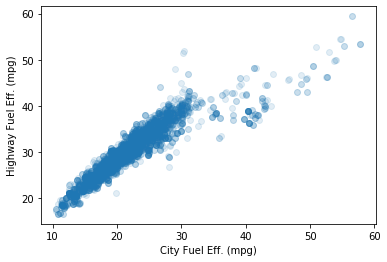

In [2]:
    plt.scatter(data = fuel_econ, x = 'city', y = 'highway', alpha = 1/8)
    # plt.plot([10,60], [10,60]) # diagonal line from (10,10) to (60,60)
    plt.xlabel('City Fuel Eff. (mpg)')
    plt.ylabel('Highway Fuel Eff. (mpg)')

### Task 2: Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). Use a heat map to depict the data. How strong is this trend?

Text(0, 0.5, 'CO2 (g/mi)')

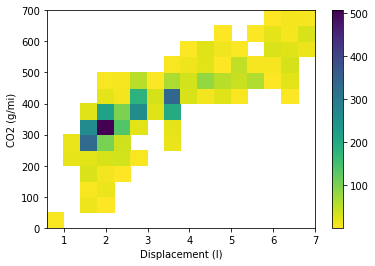

In [3]:
    bins_x = np.arange(0.6, fuel_econ['displ'].max()+0.4, 0.4)
    bins_y = np.arange(0, fuel_econ['co2'].max()+50, 50)
    plt.hist2d(data = fuel_econ, x = 'displ', y = 'co2', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
    plt.colorbar()
    plt.xlabel('Displacement (l)')
    plt.ylabel('CO2 (g/mi)')


### Task: What is the relationship between the size of a car and the size of its engine? The cars in this dataset are categorized into one of five different vehicle classes based on size. Starting from the smallest, they are: {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, and Large Cars}. The vehicle classes can be found in the 'VClass' variable, while the engine sizes are in the 'displ' column (in liters). Hint: Make sure that the order of vehicle classes makes sense in your plot!

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

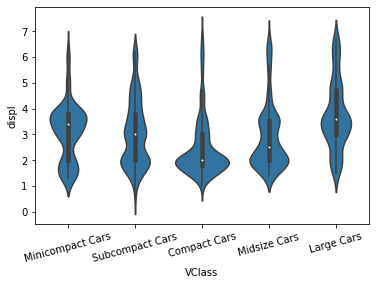

In [4]:
    sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
        fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
    else: # pre-v0.21
        fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True,
                                                         categories = sedan_classes)
        
     # plotting
    base_color = sb.color_palette()[0]
    sb.violinplot(data = fuel_econ, x = 'VClass', y = 'displ',
                  color = base_color)
    plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

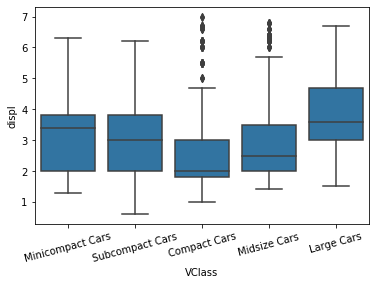

In [5]:
    base_color = sb.color_palette()[0]
    sb.boxplot(data = fuel_econ, x = 'VClass', y = 'displ',
                  color = base_color)
    plt.xticks(rotation = 15)

### Task: Use a plot to explore whether or not there differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) Note: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

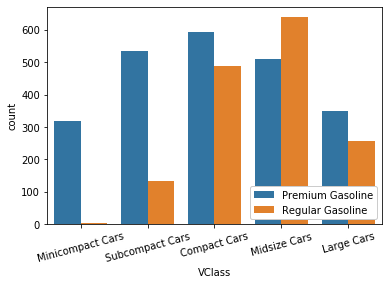

In [7]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
        fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
else: # pre-v0.21
        fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True,
                                                         categories = sedan_classes)
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

    # plotting
ax = sb.countplot(data = fuel_econ_sub, x = 'VClass', hue = 'fuelType')
ax.legend(loc = 4, framealpha = 1) # lower right, no transparency
plt.xticks(rotation = 15)